In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [0]:
%matplotlib inline

In [0]:
y = np.array([199.31, 199.53, 200.19, 200.82, 201.92, 201.95, 202.18, 245.57])
x = np.arange(len(y))

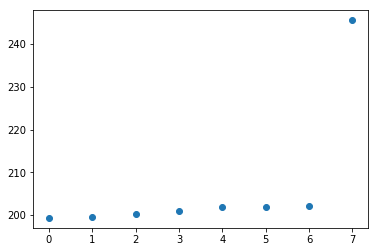

In [0]:
plt.scatter(x,y)

<center> <H1> Grubb's Test for Outlier Detection </H1> </center>

\begin{equation}
\begin{array}{l}{\text { Grubbs' test is defined for the hypothesis: }} \\ {\begin{array}{ll}{\text { Ho: }} & {\text { There are no outliers in the data set }} \\ {\mathrm{H}_{\mathrm{a}} :} & {\text { There is exactly one outlier in the data set }}\end{array}}\end{array}
\end{equation}

\begin{equation}
\begin{array}{l}{\text {The Grubbs' test statistic is defined as: }} \\ {\qquad G_{calculated}=\frac{\max \left|Y_{i}-\overline{Y}\right|}{s}} \\ {\text { with } \overline{Y} \text { and } s \text { denoting the sample mean and standard deviation, respectively. The }} \\ {\text { Grubbs' test statistic is the largest absolute deviation from the sample mean in units of }} \\ {\text { the sample standard deviation. }}\end{array}
\end{equation}

\begin{equation}
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
\end{equation}

<center> <H1> Let's start with the Critical Value Calculation </H1> </center>

\begin{equation}
\begin{array}{l}\\ {\qquad G_{calculated}=\frac{\max \left|Y_{i}-\overline{Y}\right|}{s}}\end{array} \end{equation}

In [0]:
avg_y = np.mean(y)
print (avg_y)

206.43375


In [0]:
abs_val_minus_avg = abs(y - avg_y)
print (abs_val_minus_avg)

[ 7.12375  6.90375  6.24375  5.61375  4.51375  4.48375  4.25375 39.13625]


In [0]:
max_of_deviations = max(abs_val_minus_avg)
print (max_of_deviations)

39.13624999999999


In [0]:
s = np.std(y)
print (s)

14.828716176308047


In [0]:
Gcalculated = max_of_deviations/ s
print (Gcalculated)

2.6392203839283317


\begin{equation}
G_{critical}=\frac{(N-1)}{\sqrt{N}} \sqrt{\frac{\left(t_{\alpha /(2 N), N-2}\right)^{2}}{N-2+\left(t_{\alpha /(2 N), N-2}\right)^{2}}}
\end{equation}

In [0]:
def calculate_critical_value(size, alpha):
    """Calculate the critical value with the formula given for example in
    https://en.wikipedia.org/wiki/Grubbs%27_test_for_outliers#Definition
    Args:
        ts (list or np.array): The timeseries to compute the critical value.
        alpha (float): The significance level.
    Returns:
        float: The critical value for this test.
    """
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs Critical Value: {}".format(critical_value))
    return critical_value

In [0]:
Gcritical = calculate_critical_value(len(y), 0.05)

Grubbs Critical Value: 2.1266450871956257


<center> <H1> Let's revisit the Hypothesis Test </H1> </center>

\begin{equation}
\begin{array}{l}{\mathrm{H}_{0} : \text { there are no outliers in the data }} \\ {\mathrm{H}_{\mathrm{a}} : \text { the maximum value is an outlier }} \\ {\text { Test statistic: } G=2.63} \\ {\text { significance level: } \alpha=0.05} \\ {\text { Critical value for Grubb's Test: } 2.12} \\ {\text {} \text { } }\end{array}
\end{equation}